# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [7]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


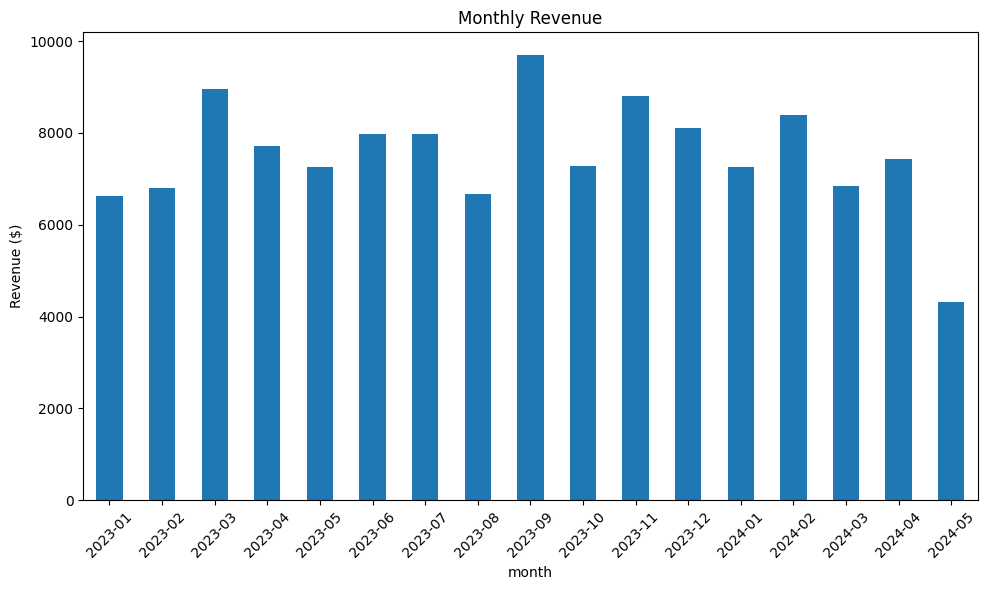

In [8]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Monthly Revenue for 2024Q2:
month
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64

Total Revenue for 2024Q2: $11,745.00


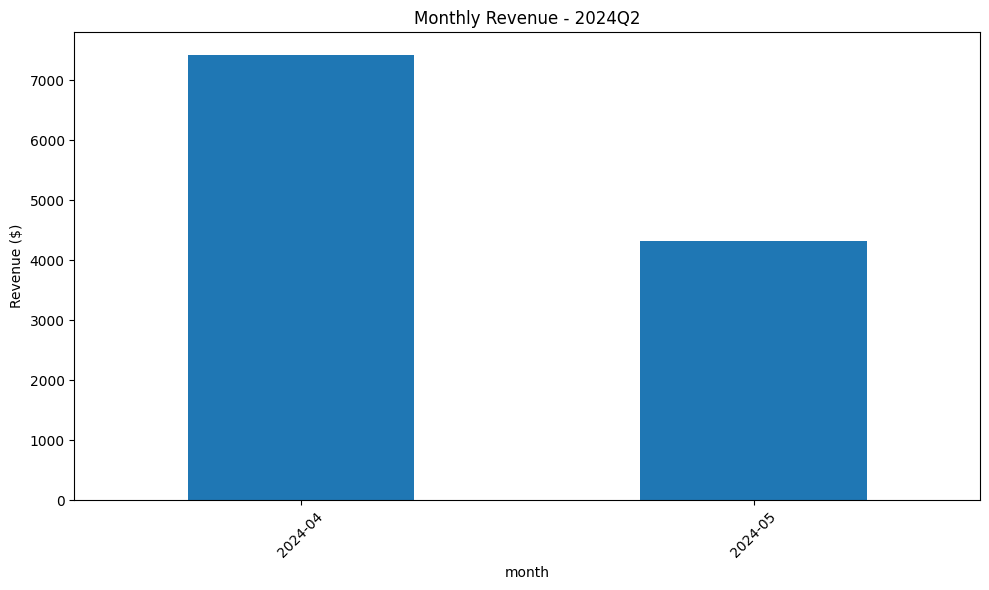

In [18]:
# Your code here

# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["quarter"] = data["order_date"].dt.to_period("Q")
data["day_of_week"] = data["order_date"].dt.day_name()

# Find the most recent quarter
latest_quarter = data["quarter"].max()

# Filter data for that quarter only
last_quarter_data = data[data["quarter"] == latest_quarter]

# Revenue by month (within the last quarter)
monthly_revenue = last_quarter_data.groupby("month")["revenue"].sum()

print(f"Monthly Revenue for {latest_quarter}:")
print(monthly_revenue)
print(f"\nTotal Revenue for {latest_quarter}: ${monthly_revenue.sum():,.2f}")

# Plot monthly revenue for the last quarter
monthly_revenue.plot(kind="bar", figsize=(10,6), title=f"Monthly Revenue - {latest_quarter}")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

Top 5 Customers by Total Revenue Contribution:
   customer_id  revenue
0           62  4448.39
1           24  3369.44
2           90  2976.78
3           92  2838.74
4           97  2835.62


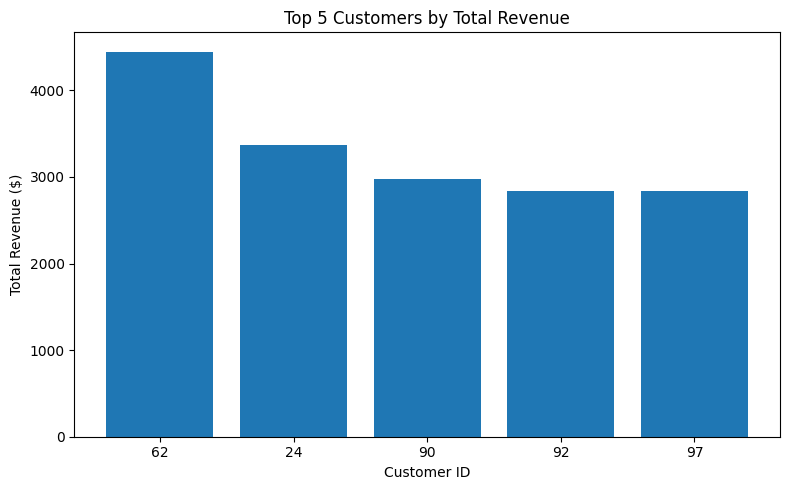

In [20]:
# Your code here

# Calculate total revenue per customer
top_customers = (
    data.groupby("customer_id")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# Print results
print("Top 5 Customers by Total Revenue Contribution:")
print(top_customers)

plt.figure(figsize=(8, 5))
plt.bar(top_customers["customer_id"].astype(str), top_customers["revenue"])
plt.title("Top 5 Customers by Total Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue ($)")
plt.tight_layout()
plt.show()

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [21]:
# Your code here
avg_spending = data.groupby("customer_segment")["revenue"].mean().sort_values(ascending=False)
print(avg_spending)

customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

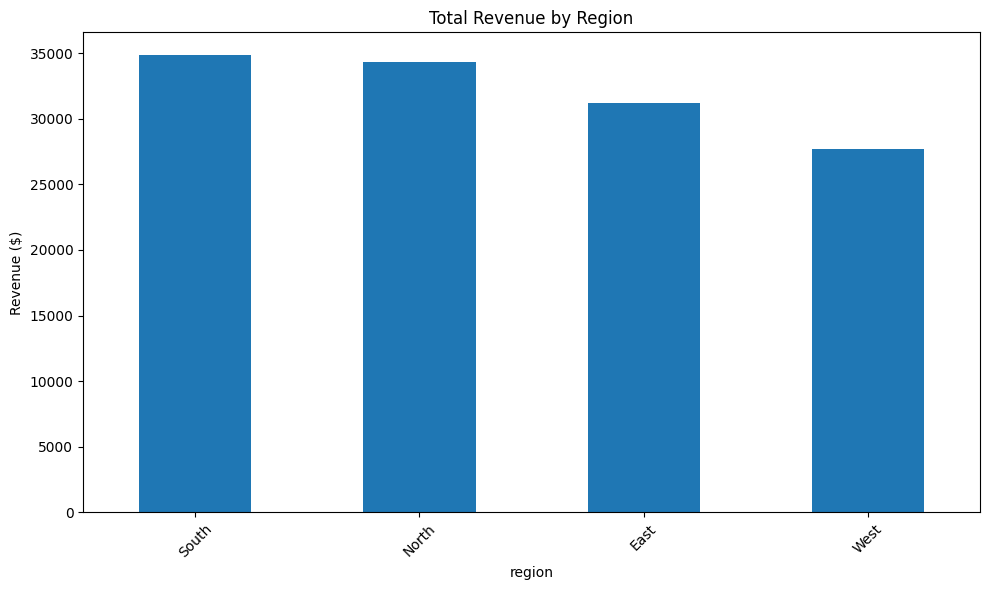

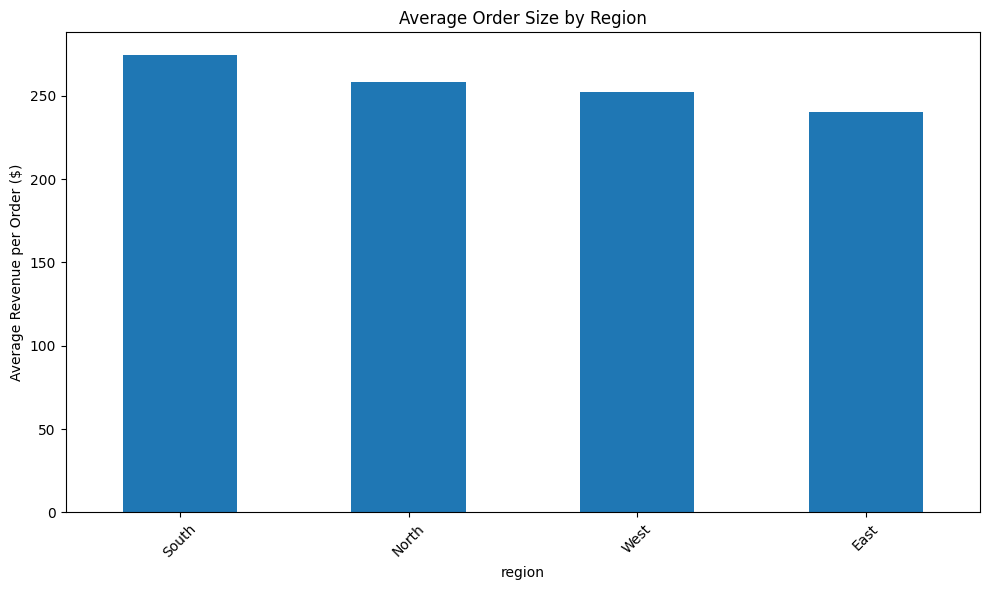

In [24]:
# Your code here

# Total revenue by region
total_revenue_by_region = data.groupby("region")["revenue"].sum().sort_values(ascending=False)

# Plot total revenue by region
plt.figure(figsize=(10,6))
total_revenue_by_region.plot(kind="bar", title="Total Revenue by Region")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average order size by region
avg_order_by_region = data.groupby("region")["revenue"].mean().sort_values(ascending=False)

# Plot average order size by region
plt.figure(figsize=(10,6))
avg_order_by_region.plot(kind="bar",title="Average Order Size by Region")
plt.ylabel("Average Revenue per Order ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

Most Popular by Quantity:
 product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64


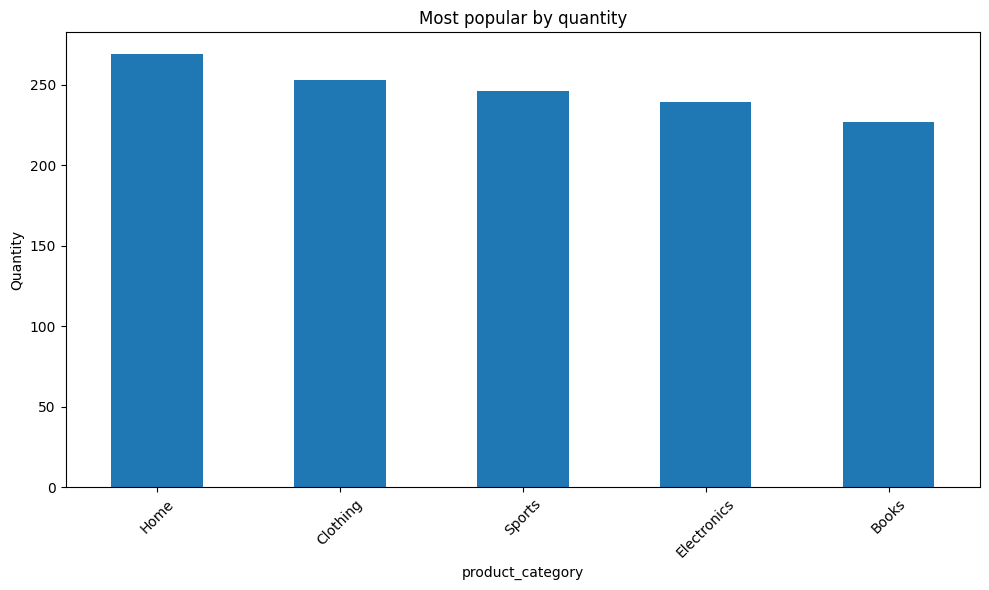


Most Popular by Revenue:
 product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64


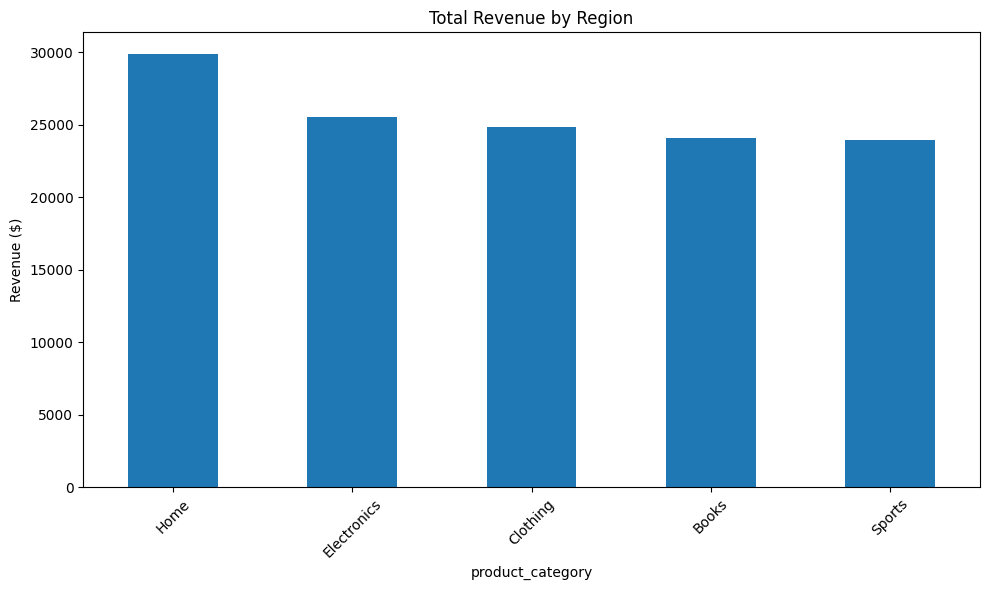

In [27]:
# Your code here

# Most popular by quantity
popular_by_quantity = data.groupby("product_category")["quantity"].sum().sort_values(ascending=False)
print("Most Popular by Quantity:\n", popular_by_quantity)

# Plot total revenue by region
plt.figure(figsize=(10,6))
popular_by_quantity.plot(kind="bar", title="Most popular by quantity")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Most popular by revenue
popular_by_revenue = data.groupby("product_category")["revenue"].sum().sort_values(ascending=False)
print("\nMost Popular by Revenue:\n", popular_by_revenue)

# Plot total revenue by region
plt.figure(figsize=(10,6))
popular_by_revenue.plot(kind="bar", title="Total Revenue by Region")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

Average Revenue per Order:
discount_applied
0     248.296337
5     266.914237
10    264.531364
15    283.809796
20    215.790000
25    301.361000
30    245.007727
Name: revenue, dtype: float64


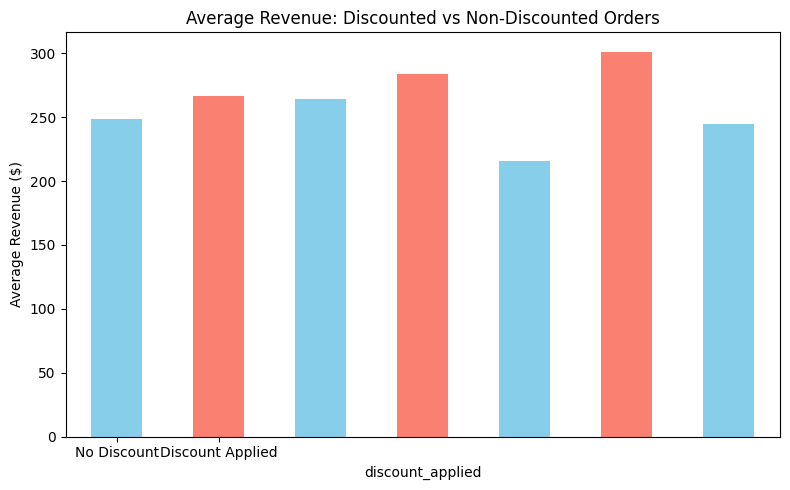

In [29]:
# Your code here
# Calculate average revenue per order for discounted vs non-discounted
avg_revenue_by_discount = data.groupby("discount_applied")["revenue"].mean()

print("Average Revenue per Order:")
print(avg_revenue_by_discount)

plt.figure(figsize=(8,5))
avg_revenue_by_discount.plot(kind="bar", color=["skyblue","salmon"], title="Average Revenue: Discounted vs Non-Discounted Orders")
plt.ylabel("Average Revenue ($)")
plt.xticks([0,1], ["No Discount", "Discount Applied"], rotation=0)
plt.tight_layout()
plt.show()

### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

Percentage of Orders by Payment Method:
 payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: count, dtype: float64


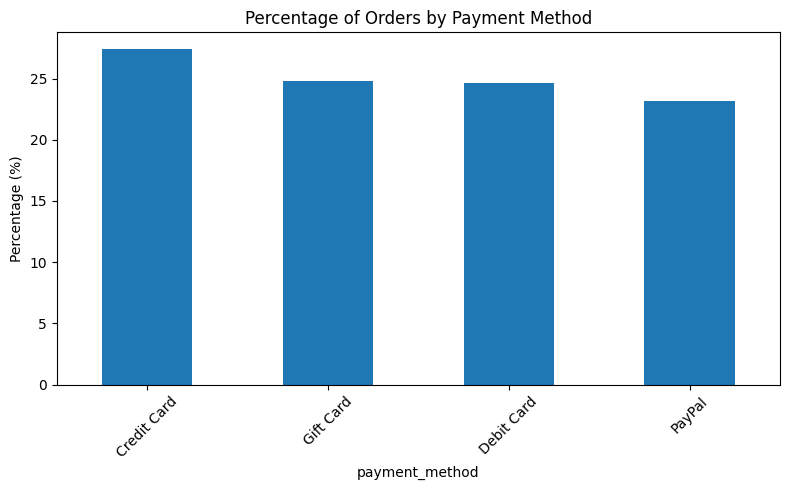


Average Revenue per Order by Payment Method:
 payment_method
Debit Card     275.980650
Credit Card    257.444234
Gift Card      254.362500
PayPal         236.071034
Name: revenue, dtype: float64


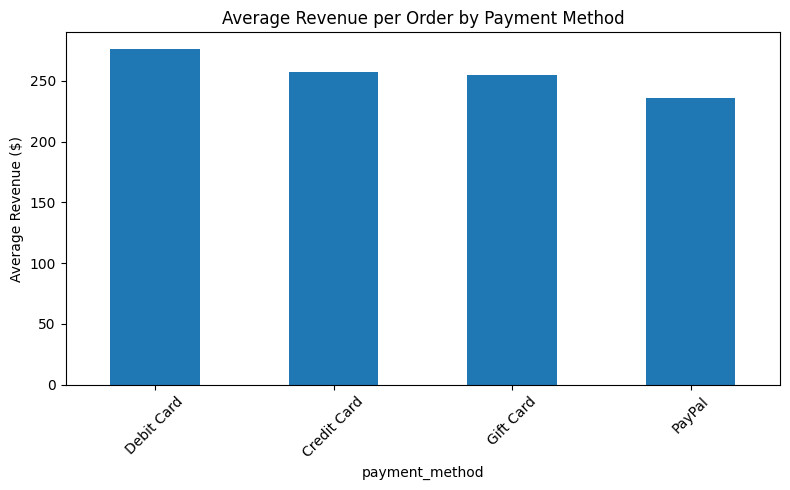

In [31]:
# Your code here

# 1. Percentage of orders by payment method
payment_counts = data["payment_method"].value_counts()
payment_percent = (payment_counts / payment_counts.sum() * 100).round(2)
print("Percentage of Orders by Payment Method:\n", payment_percent)

# Bar chart for payment method percentages
plt.figure(figsize=(8,5))
payment_percent.plot(kind="bar", title="Percentage of Orders by Payment Method")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Average spending per payment method
avg_spending_by_payment = data.groupby("payment_method")["revenue"].mean().sort_values(ascending=False)
print("\nAverage Revenue per Order by Payment Method:\n", avg_spending_by_payment)

# Bar chart for average spending by payment method
plt.figure(figsize=(8,5))
avg_spending_by_payment.plot(kind="bar", title="Average Revenue per Order by Payment Method")
plt.ylabel("Average Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

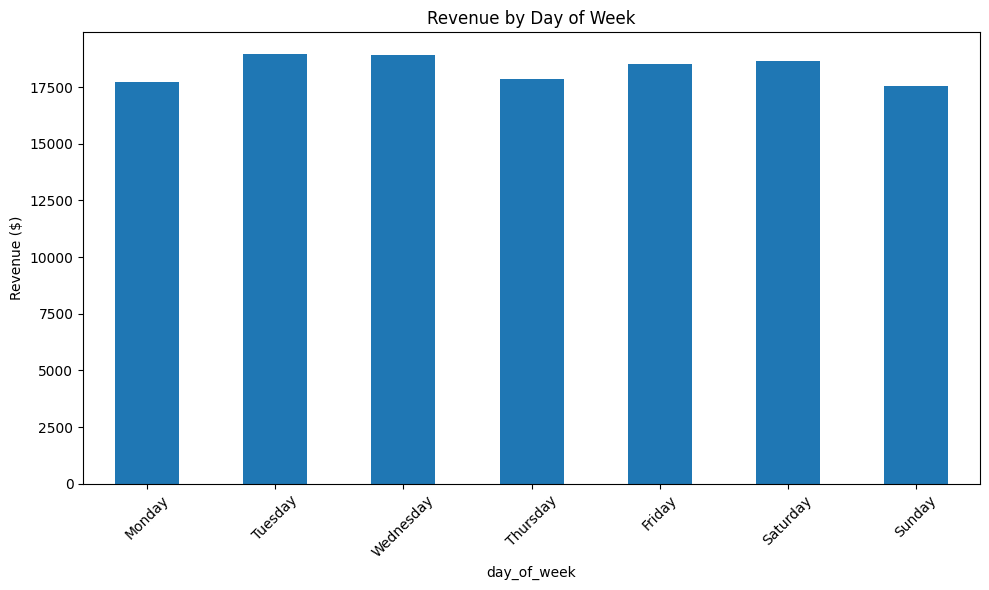

In [33]:
# Your code here

# Convert order_date to datetime if not already
data["order_date"] = pd.to_datetime(data["order_date"])

# Add a day_of_week column
data["day_of_week"] = data["order_date"].dt.day_name()  # Monday, Tuesday, etc.

# Aggregate revenue by day of week
revenue_by_day = data.groupby("day_of_week")["revenue"].sum()

# Optional: order the days correctly
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
revenue_by_day = revenue_by_day.reindex(days_order)

# Plot revenue by day of week
plt.figure(figsize=(10,6))
revenue_by_day.plot(kind="bar", title="Revenue by Day of Week")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Estimated Total Profit: $25,628.13

Profit by Region:
 region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: profit, dtype: float64


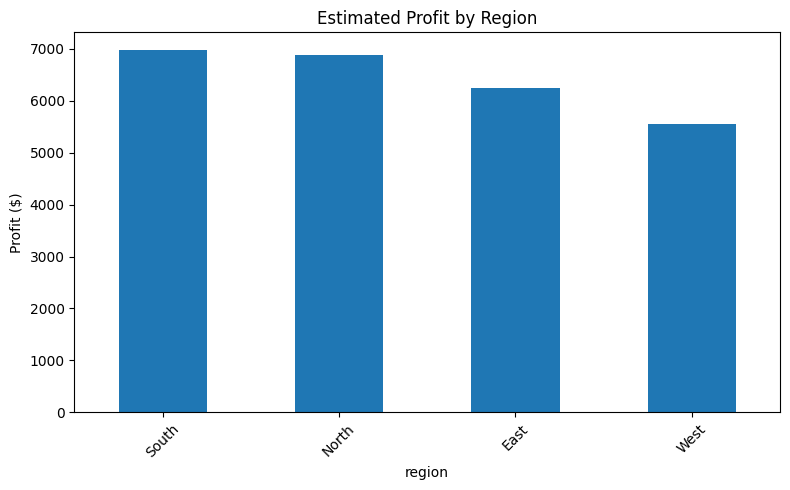

In [35]:
# Your code here

# 1. Calculate profit per order
profit_margin = 0.20
data["profit"] = data["revenue"] * profit_margin

# 2. Total profit
total_profit = data["profit"].sum()
print(f"Estimated Total Profit: ${total_profit:,.2f}")

# 3. Profit by region
profit_by_region = data.groupby("region")["profit"].sum().sort_values(ascending=False)
print("\nProfit by Region:\n", profit_by_region)

plt.figure(figsize=(8,5))
profit_by_region.plot(kind="bar", title="Estimated Profit by Region")
plt.ylabel("Profit ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.